In [0]:
#!pip  install mnist

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import SVG

import warnings
warnings.filterwarnings('ignore')

# Домашняя работа 
### Урок 3. Keras

In [0]:
import mnist
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot

In [0]:
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='gray')
    plt.show()


In [572]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


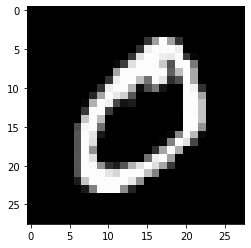

In [573]:
plot_image(X_train[1])

In [0]:
model = Sequential([
  Dense(529, activation='relu', input_shape=(784,)),
  Dense(256, activation='tanh'),
  Dense(10, activation='softmax')
])

In [0]:
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [0]:
model.fit(
  X_train,
  to_categorical(y_train),
  epochs=75,
  batch_size=256,
  verbose = 0,
  validation_data = (X_test,to_categorical(y_test)),
  shuffle = False,
);

In [0]:
results = model.evaluate(X_test, to_categorical(y_test), batch_size=256, verbose=0)

In [578]:
results

[0.07196026664124777, 0.9869999885559082]

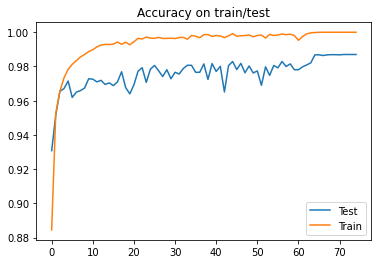

In [579]:
plt.plot(model.history.history['val_accuracy'],label ='Test' )
plt.plot(model.history.history['accuracy'],label = 'Train')
plt.title('Accuracy on train/test')
plt.legend();

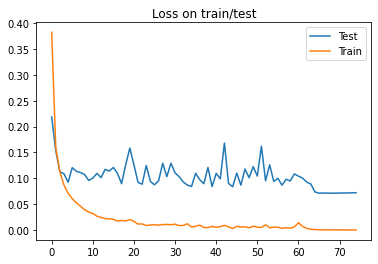

In [580]:
plt.plot(model.history.history['val_loss'],label ='Test' )
plt.plot(model.history.history['loss'],label = 'Train')
plt.title('Loss on train/test')
plt.legend();

# Conclusion

## Best ACC score - 0.9869999885559082 on test